In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/loan.csv")

df1 = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/loan.csv")

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observaions:

1. Mean < Median (50%) ===> Loan_Amount_Term , Credit_History ==> Left Skewed
2. Data Large difference between 75 % and max ===> ApplicantIncome , CoapplicantIncome , LoanAmount, Loan_Amount_Term  ===> Outliers Present
3. Mean > than Median (50%) ==> ApplicantIncome , CoapplicantIncome, Loan Amount ==> Right Skewed Distribution

# Checking NaN values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

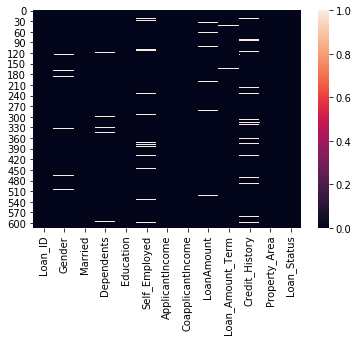

In [7]:
sns.heatmap(df.isnull())

Null values are present 

# Removing NaN Values

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
list = ["Gender" , "Married" , "Dependents" ,"Self_Employed",  "LoanAmount", "Loan_Amount_Term" , "Credit_History"]

for i in range(len(list)):
    print(list[i] , "=" , df[list[i]].mode())


Gender = 0    Male
dtype: object
Married = 0    Yes
dtype: object
Dependents = 0    0
dtype: object
Self_Employed = 0    No
dtype: object
LoanAmount = 0    120.0
dtype: float64
Loan_Amount_Term = 0    360.0
dtype: float64
Credit_History = 0    1.0
dtype: float64


In [10]:
# Replacing NAN

df["Gender"] = df["Gender"].replace(np.nan,"Male")
df["Married"] = df["Married"].replace(np.nan,"Yes")
df["Dependents"] = df["Dependents"].replace(np.nan,0)
df["Self_Employed"] = df["Self_Employed"].replace(np.nan,"No")
df["LoanAmount"] = df["LoanAmount"].replace(np.nan,120.0)
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].replace(np.nan,360.0)
df["Credit_History"] = df["Credit_History"].replace(np.nan,1.0)

#Replaces NAN in Item_Weight with mode value

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Checking for ?

In [13]:
(df == '?').sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoder

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
# Converting non numeric data to numeric for data analysis

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'].astype(str))
df['Married'] = le.fit_transform(df['Married'].astype(str))
df['Education'] = le.fit_transform(df['Education'].astype(str))
df['Self_Employed'] = le.fit_transform(df['Self_Employed'].astype(str))
df['Property_Area'] = le.fit_transform(df['Property_Area'].astype(str))
df['Loan_Status'] = le.fit_transform(df['Loan_Status'].astype(str))
df['Dependents'] = le.fit_transform(df['Dependents'].astype(str))

In [16]:
# Dropping loan Id column not relavent

df = df.drop(["Loan_ID"] , axis = 1)

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Univarient Analysis

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


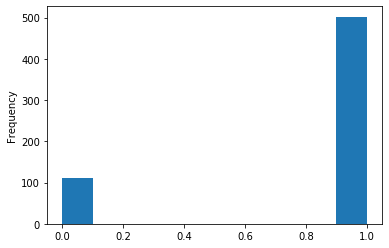

In [19]:
# More male applicants are there than females

df["Gender"].plot.hist()

In [20]:
df1.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

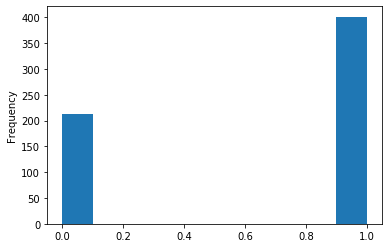

In [21]:
# More married applicants are there than singles

df["Married"].plot.hist()

In [22]:
df1.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

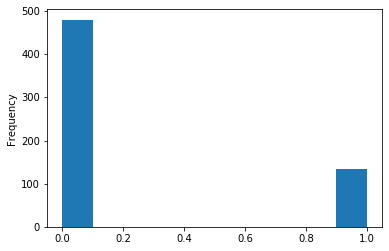

In [23]:
# More graduate applicants are there than non graduates

df["Education"].plot.hist()

In [24]:
df1.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

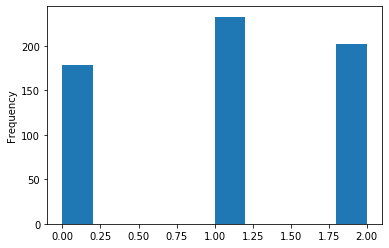

In [25]:
# More semiurban applicants are there than urban . Rural applicants are least

df["Property_Area"].plot.hist()

In [26]:
df1.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Bivarient Analysis

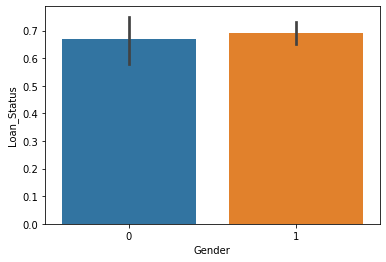

In [27]:
# Males received more loans than females

sns.barplot(x=df['Gender'], y=df['Loan_Status'],data=df)
plt.show()

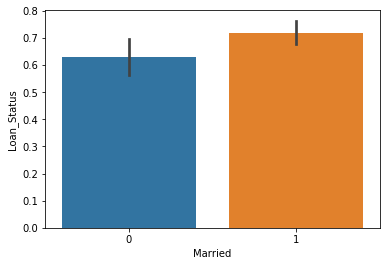

In [28]:
# Married person received more loans than singles

sns.barplot(x=df['Married'], y=df['Loan_Status'],data=df)
plt.show()

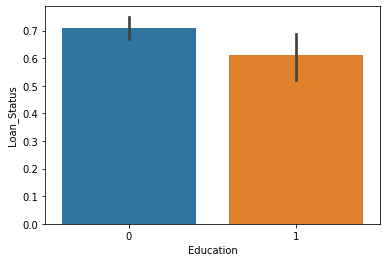

In [29]:
# Graduates received little more loans than Non-graduates

sns.barplot(x=df['Education'], y=df['Loan_Status'],data=df)
plt.show()

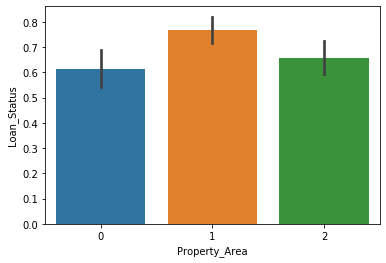

In [30]:
# Semi Urban received little more loans

sns.barplot(x=df['Property_Area'], y=df['Loan_Status'],data=df)
plt.show()

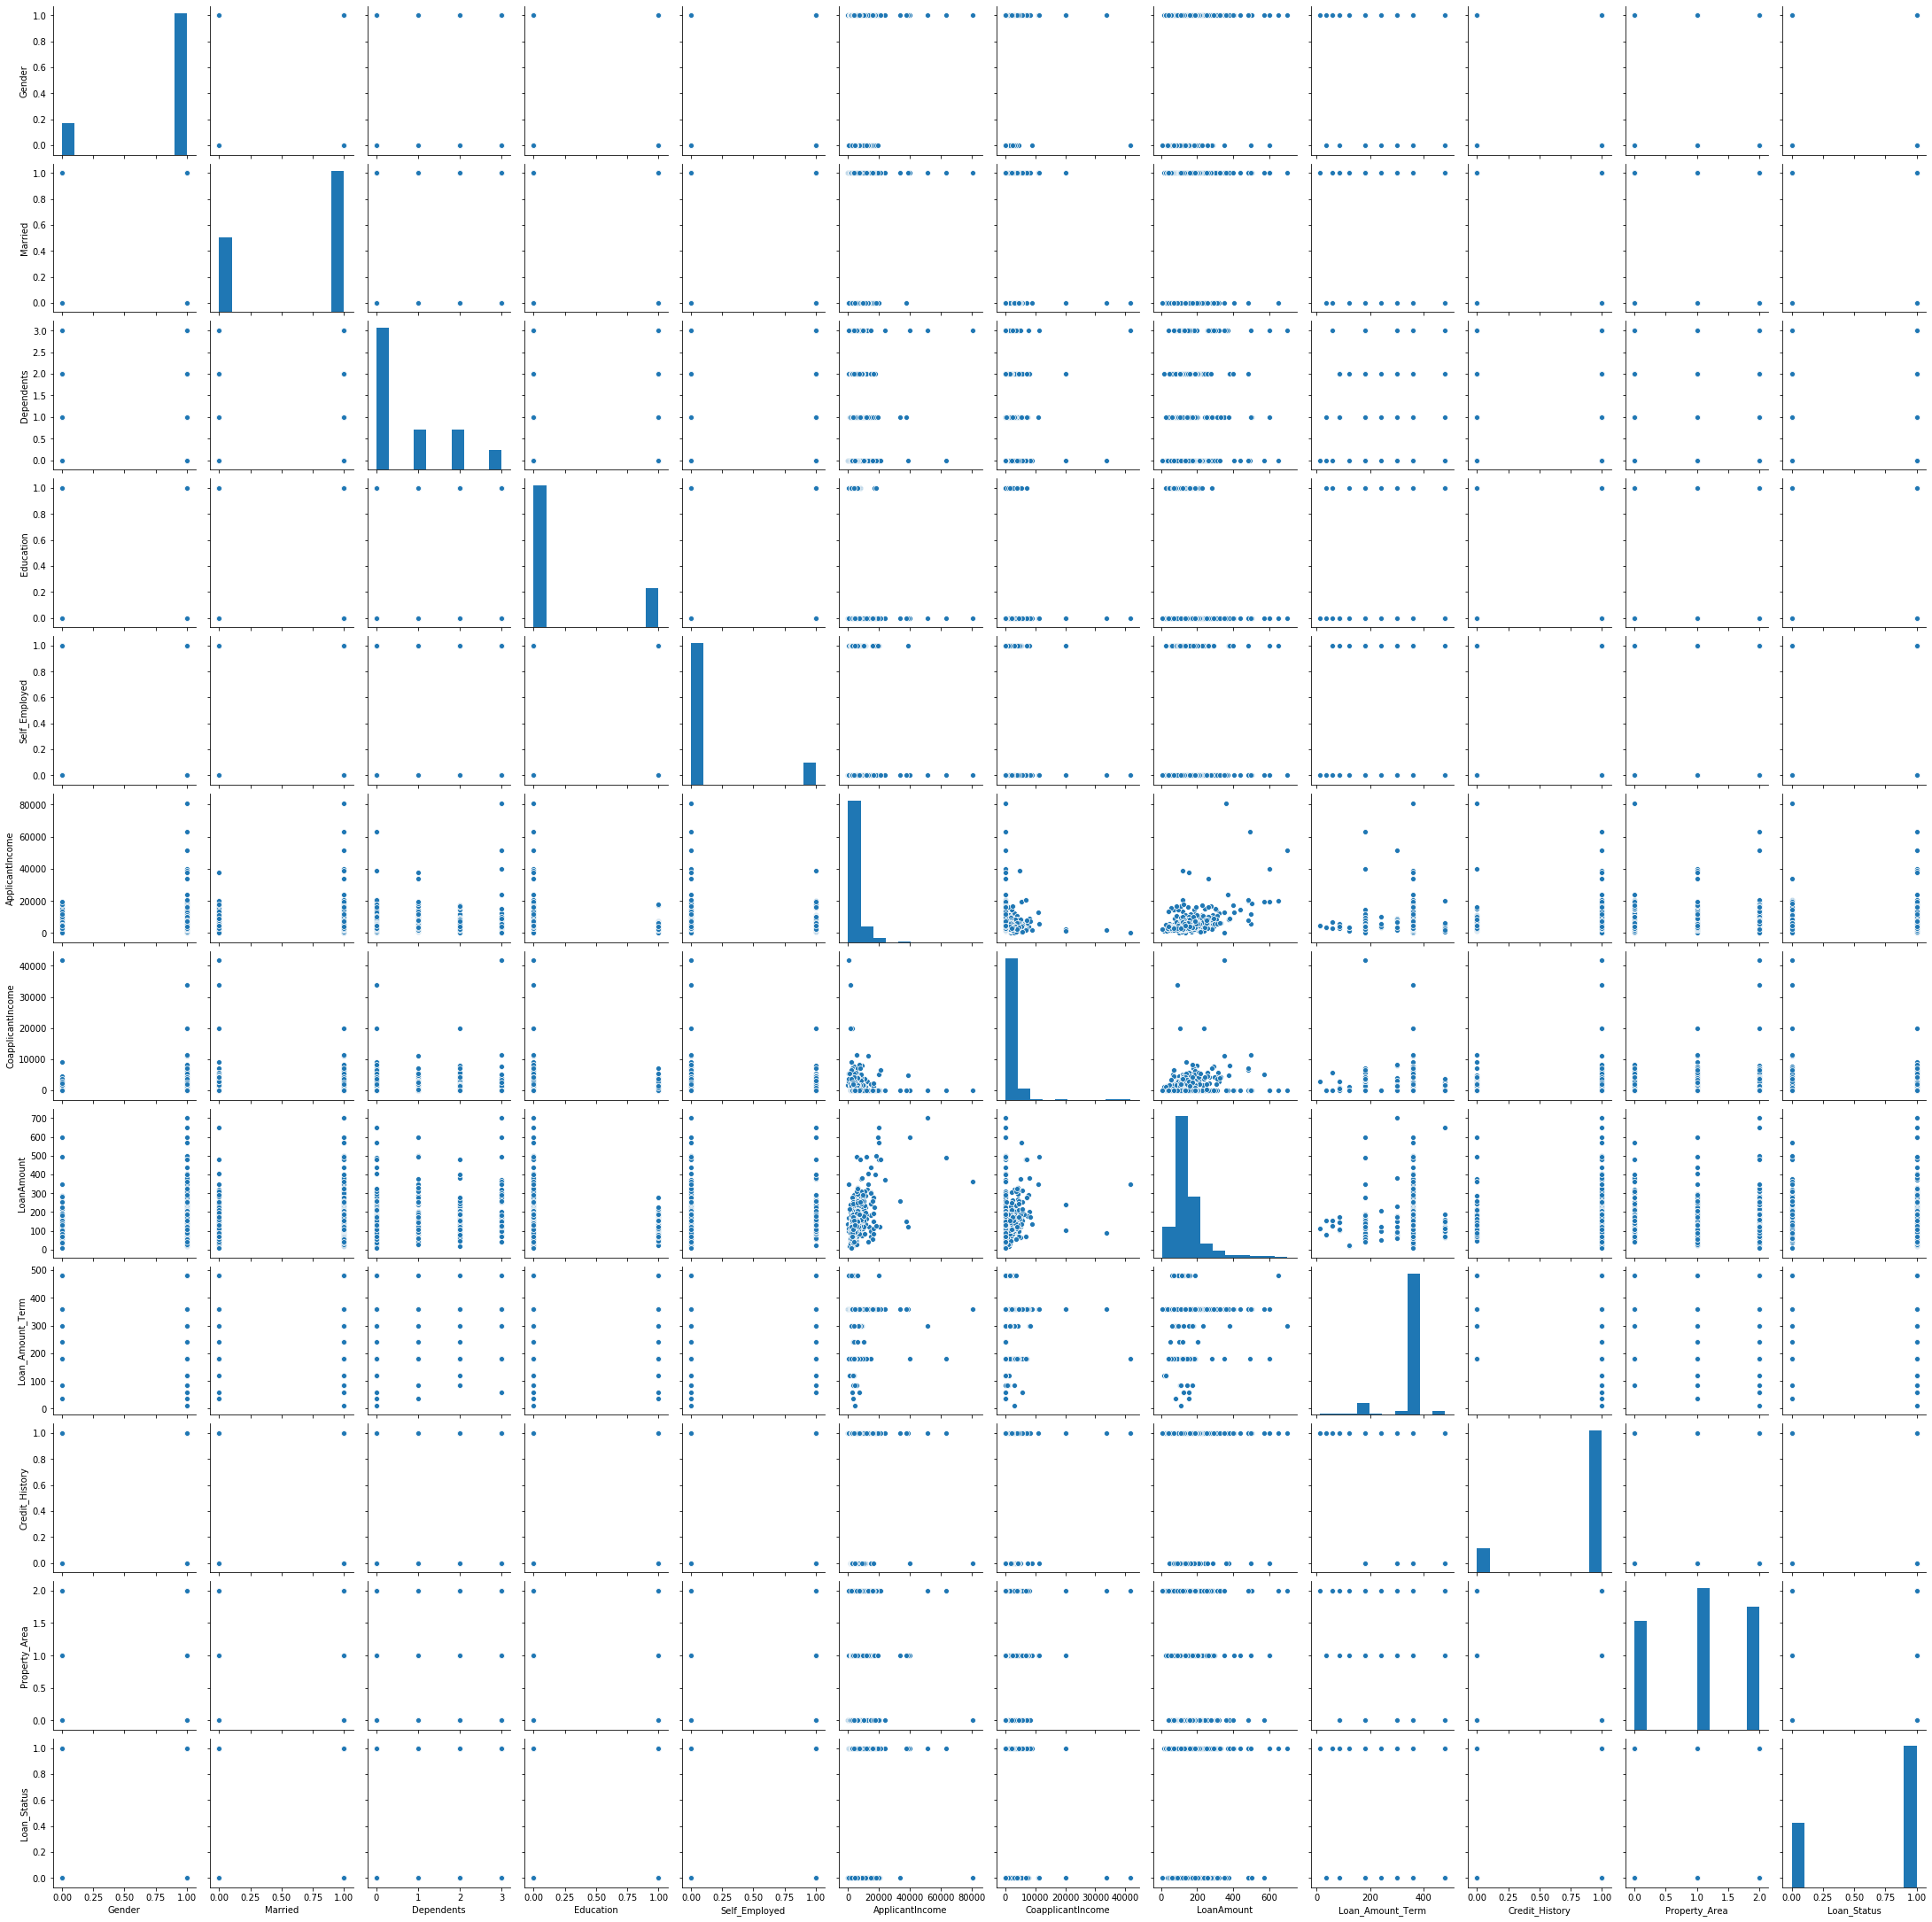

In [31]:
sns.pairplot(df)

In [31]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


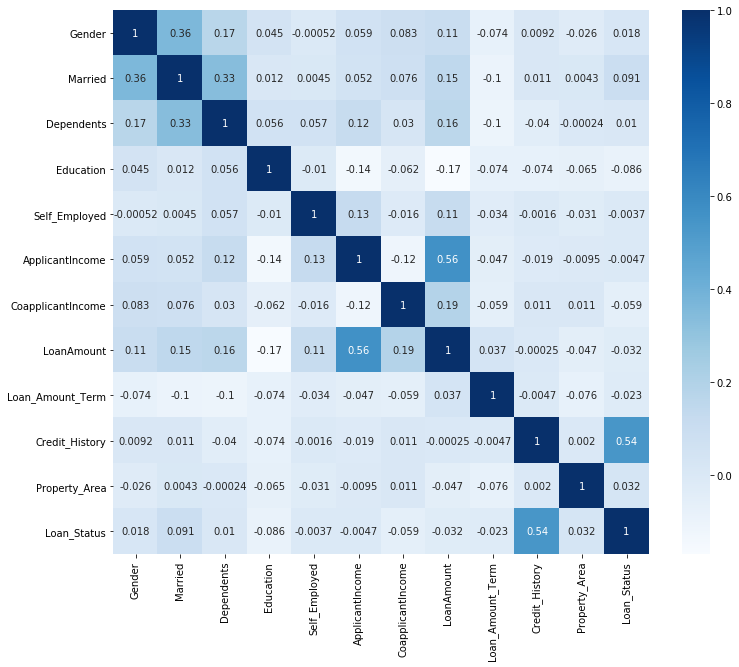

In [32]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr() ,  cmap = "Blues" , annot = True)

Observations

1. Positively correlated -

Loan_Status - Credit_History

2. Negatively correlated -

Loan_Status - Education  and CoapplicantIncome

# Checking out Outliers and removing

In [33]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [34]:
col_list = df.columns.values

ncols = 10
nrows = 12

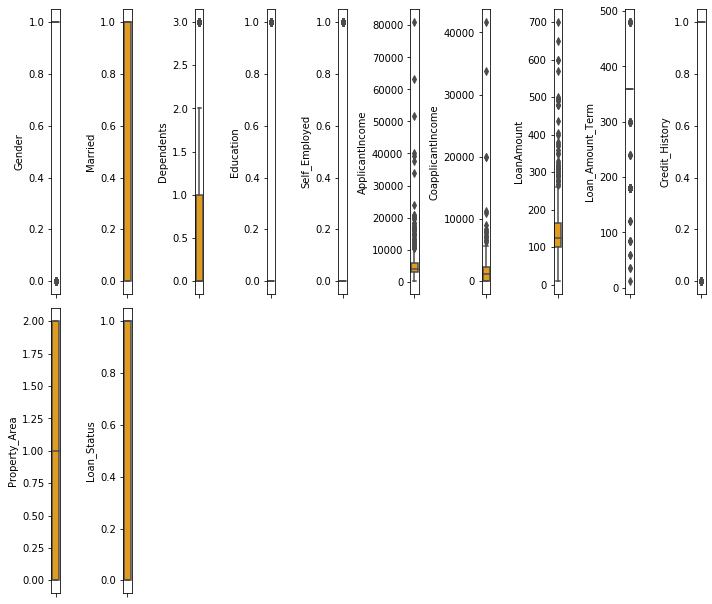

In [36]:

plt.figure(figsize = (ncols, 5*ncols))
for i in range( 0 , len(col_list)):
    plt.subplot(nrows , ncols , i+1)
    sns.boxplot(df[col_list[i]] , color = 'orange' , orient = 'v')
    plt.tight_layout()

Outliers Present

In [18]:
from scipy.stats import zscore


z = np.abs(zscore(df))

df_new = df[(z<3).all(axis = 1) ]

df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Since Post applying Zscore method to remove outliers the DataFrame becomes empty we shall use the DataFrame with the outliers

# Splitting in to Attributes and Target variables

In [19]:
x = df.drop(["Loan_Status"],axis = 1)

x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [20]:
x.shape

(614, 11)

In [21]:
y = df["Loan_Status"]

y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [22]:
y = y.values.reshape(-1,1)

y.shape

(614, 1)

# Checking Skewness

In [40]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

In [41]:
# Reducing Skewness using squareroot method of numpy
x1 = x

for col in x1.columns:
    if x1.skew().loc[col]>0.55:
        x1[col] = np.sqrt(x1[col])[0]

In [42]:
x1.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

# Scaling x

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x2 = sc.fit_transform(x)
x2 = pd.DataFrame(x2,columns = x.columns)
x2

# Using x as skewness isnt gettting removed

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.302759,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.207648,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.944757,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.302759,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.053093,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.885313,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.253868,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.278459,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.493794,0.273231,0.411733,1.223298


# Data Analysis - Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, auc, roc_curve


In [36]:
## x gives best result without removing skewness

x_train,x_test,y_train,y_test = train_test_split(x2,y,random_state = 43 , test_size = 0.20)

In [47]:
x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((491, 11), (123, 11), (491, 1), (123, 1))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [27]:
lreg = LogisticRegression()
knr = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
gn = GaussianNB()

In [50]:
#Best parameter for Logistic Regression



parameters = { 'penalty' : ('11', '12' , 'none')}
gs = GridSearchCV(lreg , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'penalty': 'none'}

In [51]:
#Best parameter for KNearestNeighbors

parameters = { 'n_neighbors' : (1,10)}
gs = GridSearchCV(knr , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'n_neighbors': 10}

In [52]:
#Best parameter for Decision Tree

parameters = { 'criterion' : ('gini' , 'entropy') }
gs = GridSearchCV(dtc , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'entropy'}

In [28]:
lreg = LogisticRegression(penalty = 'none')
knr = KNeighborsClassifier(n_neighbors= 10)
dtc = DecisionTreeClassifier(criterion = 'entropy')

In [29]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
accuracyscore = accuracy_score(y_test,pred)
confmatrix = confusion_matrix(y_test,pred)
classreport = classification_report(y_test,pred)


print("Accuracy Score : " , accuracyscore)
print("\nConfusion Matrix : " , confmatrix)
print("\nClassification Report : " , classreport)

Accuracy Score :  0.8130081300813008

Confusion Matrix :  [[17 21]
 [ 2 83]]

Classification Report :                precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [86]:
#Best parameter for GradientBooster

gbr = GradientBoostingClassifier()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(gbr , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [87]:
#Best parameter for Random Forest

rf = RandomForestClassifier()
parameters = {  "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(rf , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_


{'n_estimators': 100}

In [88]:
#Best parameter for Ada Booster

abr = AdaBoostClassifier()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000] , 
              "base_estimator" :[lreg, dtc , knr , svc  ]}
gs = GridSearchCV(abr , parameters , cv = 5)
gs.fit(x,y)
gs.best_params_

{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='none',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [31]:
gbr = GradientBoostingClassifier(learning_rate = 0.001 ,n_estimators = 500 )
rf = RandomForestClassifier(n_estimators = 100)
abr = AdaBoostClassifier(learning_rate = 0.001 ,n_estimators = 10 , base_estimator = lreg )

In [32]:
models = []
models.append(('KNeighborsClassifier' , knr))
models.append(('LogisticRegression' , lreg))
models.append(('GradientBooster' , gbr))
models.append(('AdaboostClassifier' , abr))
models.append(('RandomForestClassifier' , rf))
models.append(('DecisionTreeClassifier' , dtc))
models.append(('SVC' , svc))
models.append(('GaussianNB' , gn))

models

[('KNeighborsClassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                       weights='uniform')),
 ('LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='none',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('GradientBooster',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.001, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
            

In [33]:
Model = []
accuracyscore = []
cv = []
rocscore = []

for name,model in models:
    print("***************************" , name , "***************************\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred = model.predict(x_test)
    print("\n")
    AS = accuracy_score(y_test,pred)
    print("Accuracy Score :" , AS)
    accuracyscore.append(AS*100)
    print("\n")
    sc = cross_val_score(model , x, y , cv = 10 , scoring = 'r2')
    print("Cross_Val_score : " , sc)
    cv.append(sc*100)
    print("\n")
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    #roc_cur = auc(false_positive_rate,true_positive_rate)
    #rocscore.append(roc_cur*100)
    #print("\n")
    confmatrix = confusion_matrix(y_test,pred)
    print("Confusion Matrix : " , confmatrix)
    print("\n")
    classreport = classification_report(y_test,pred)
    print("Classification Report : " , classreport)
    print("\n")
    

*************************** KNeighborsClassifier ***************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score : 0.6991869918699187


Cross_Val_score :  [-0.44186047 -0.74541004 -0.62380952 -0.91904762 -0.98746867 -0.52882206
 -0.91102757 -1.06390977 -0.98746867 -0.68170426]


Confusion Matrix :  [[10 28]
 [ 9 76]]


Classification Report :                precision    recall  f1-score   support

           0       0.53      0.26      0.35        38
           1       0.73      0.89      0.80        85

    accuracy                           0.70       123
   macro avg       0.63      0.58      0.58       123
weighted avg       0.67      0.70      0.66       123



*************************** LogisticRegression ***************************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
  

In [34]:
result = pd.DataFrame({'Model' : Model , 'Accuracy Score' :accuracyscore , "Cross_Val_Score" :cv})

result

,Model,Accuracy Score,Cross_Val_Score
0,KNeighborsClassifier,69.918699,"[-44.18604651162787, -74.54100367197056, -62.3..."
1,LogisticRegression,81.300813,"[8.93512851897188, 16.523867809057545, -18.095..."
2,GradientBooster,80.487805,"[8.93512851897188, 16.523867809057545, -10.714..."
3,AdaboostClassifier,81.300813,"[8.93512851897188, 16.523867809057545, -18.095..."
4,RandomForestClassifier,78.048780,"[-13.831089351285165, -6.242350061199486, -3.3..."
5,DecisionTreeClassifier,70.731707,"[-21.41982864137084, -21.41982864137084, -32.8..."
6,SVC,69.105691,"[-44.18604651162787, -44.18604651162787, -47.6..."
7,GaussianNB,79.674797,"[1.3463892288862023, 16.523867809057545, -25.4..."


In [35]:
# Best Model we consider is Logistic Regression

max_ac = 0

for rs in range(30,101):
    x_train,x_test,y_train,y_test = train_test_split(x2,y,random_state = rs , test_size = 0.20)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    accuracyscore = accuracy_score(y_test,pred)
    if accuracyscore > max_ac:
        max_ac = accuracyscore
        final_rm = rs
        print("Max Accuracy Score : " , max_ac , "Max Random State" , final_rm)


Max Accuracy Score :  0.7804878048780488 Max Random State 30
Max Accuracy Score :  0.8455284552845529 Max Random State 31
Max Accuracy Score :  0.8780487804878049 Max Random State 63


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x2,y,random_state = 63 , test_size = 0.20)
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
accuracyscore = accuracy_score(y_test,pred)

print("Accuracy Score : " , accuracyscore)
print("\nConfusion Matrix : " , confmatrix)
print("\nClassification Report : " , classreport)

Accuracy Score :  0.8780487804878049

Confusion Matrix :  [[18 20]
 [ 5 80]]

Classification Report :                precision    recall  f1-score   support

           0       0.78      0.47      0.59        38
           1       0.80      0.94      0.86        85

    accuracy                           0.80       123
   macro avg       0.79      0.71      0.73       123
weighted avg       0.79      0.80      0.78       123



# Predicting Data

In [38]:
#  Logistic Regression model is used as accuracy score is maximum 

df_pred = lg.predict(x_test)

df_predict = pd.DataFrame(df_pred)

df_predict

,0
0,1
1,1
2,1
3,1
4,0
...,...
118,1
119,0
120,1
121,1


# Saving the Model

In [39]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(lg , 'p7_Loan.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('p7_Loan.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [40]:
# Saving Predict to csv

df_predict.to_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/loan_predict.csv")